In [248]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [250]:
nycgreentaxi=pd.read_parquet("/content/drive/MyDrive/pa_project/green_tripdata_2022-03 (1).parquet")

In [251]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [252]:
nycgreentaxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78537 entries, 0 to 78536
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               78537 non-null  int64         
 1   lpep_pickup_datetime   78537 non-null  datetime64[us]
 2   lpep_dropoff_datetime  78537 non-null  datetime64[us]
 3   store_and_fwd_flag     70472 non-null  object        
 4   RatecodeID             70472 non-null  float64       
 5   PULocationID           78537 non-null  int64         
 6   DOLocationID           78537 non-null  int64         
 7   passenger_count        70472 non-null  float64       
 8   trip_distance          78537 non-null  float64       
 9   fare_amount            78537 non-null  float64       
 10  extra                  78537 non-null  float64       
 11  mta_tax                78537 non-null  float64       
 12  tip_amount             78537 non-null  float64       
 13  t

In [253]:
nycgreentaxi=nycgreentaxi.drop(["ehail_fee","fare_amount"],axis=1)

In [254]:
# Create New variable "trip_duration"
nycgreentaxi["trip_duration"]=nycgreentaxi.lpep_dropoff_datetime-nycgreentaxi.lpep_pickup_datetime

In [255]:
nycgreentaxi.trip_duration.head()

,trip_duration
0,0 days 00:09:50
1,0 days 00:07:39
2,0 days 00:14:02
3,0 days 00:08:11
4,0 days 00:06:35


In [256]:
# Convert timedelta into minutes
nycgreentaxi["trip_duration"]=nycgreentaxi["trip_duration"].dt.total_seconds()/60

In [257]:
nycgreentaxi["weekday"]=nycgreentaxi["lpep_dropoff_datetime"].dt.day_name()

In [258]:
nycgreentaxi["weekday"].value_counts(dropna=False)

,count
weekday,
Thursday,13799
Wednesday,13367
Tuesday,12798
Friday,11252
Monday,9741
Saturday,9418
Sunday,8162


In [259]:
nycgreentaxi["hour"]=nycgreentaxi["lpep_dropoff_datetime"].dt.hour

In [260]:
nycgreentaxi["hour"].value_counts(dropna=False)

,count
hour,
17,5946
18,5922
16,5451
15,5169
19,5133
14,4796
12,4649
10,4481
13,4452


In [261]:
# f) Missing Values Imputation
# Numeric columns - fill with median
num_cols = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
            'tolls_amount', 'improvement_surcharge', 'congestion_surcharge',
            'trip_duration', 'passenger_count', 'RatecodeID', 'payment_type', 'trip_type']
for col in num_cols:
    if col in nycgreentaxi.columns and nycgreentaxi[col].isnull().sum() > 0:
        nycgreentaxi[col] = nycgreentaxi[col].fillna(nycgreentaxi[col].median())

In [262]:
# Categorical columns - fill with mode
cat_cols = ['store_and_fwd_flag', 'weekday', 'hourofday']
for col in cat_cols:
    if col in nycgreentaxi.columns and nycgreentaxi[col].isnull().sum() > 0:
        nycgreentaxi[col] = nycgreentaxi[col].fillna(nycgreentaxi[col].mode()[0])

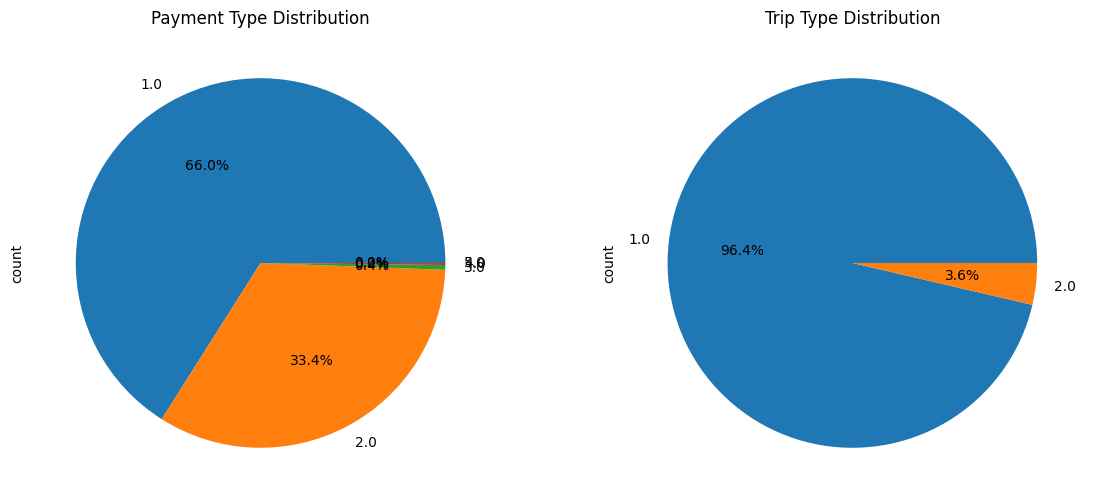

In [263]:
# g) Pie diagrams
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
nycgreentaxi['payment_type'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Payment Type Distribution')
nycgreentaxi['trip_type'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Trip Type Distribution')
plt.show()

weekday
Tuesday      17.824865
Wednesday    17.901858
Monday       18.133428
Saturday     18.350201
Thursday     18.481852
Friday       18.617568
Sunday       18.895609
Name: total_amount, dtype: float64


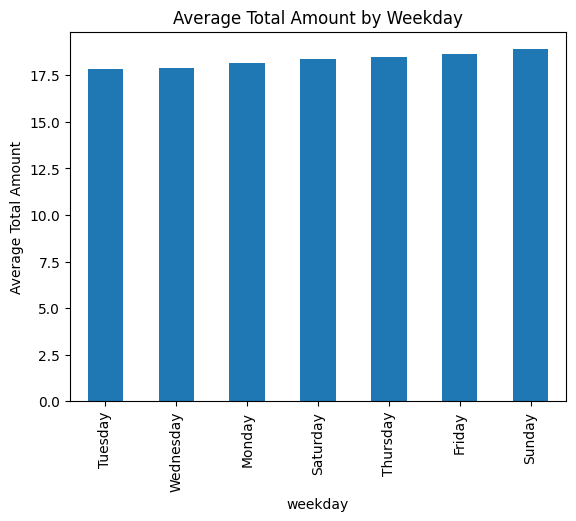

In [264]:
# h) Groupby average total_amount by weekday
weekday_avg = nycgreentaxi.groupby('weekday')['total_amount'].mean().sort_values()
print(weekday_avg)
weekday_avg.plot(kind='bar')
plt.title('Average Total Amount by Weekday')
plt.ylabel('Average Total Amount')
plt.show()

payment_type
3.0     0.404894
4.0     9.339474
5.0    10.800000
2.0    15.201053
1.0    19.972992
Name: total_amount, dtype: float64


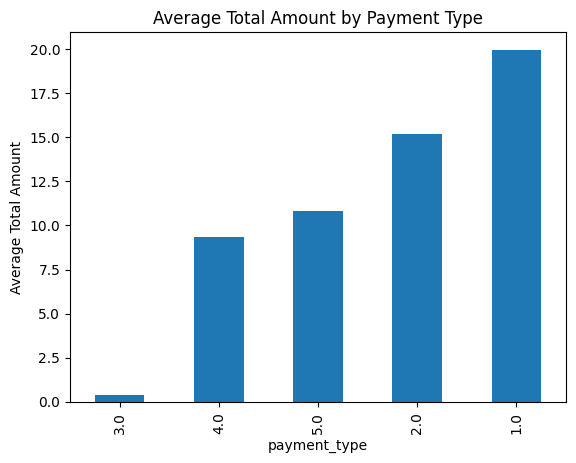

In [265]:
# i) Groupby average total_amount by payment_type
payment_avg = nycgreentaxi.groupby('payment_type')['total_amount'].mean().sort_values()
print(payment_avg)
payment_avg.plot(kind='bar')
plt.title('Average Total Amount by Payment Type')
plt.ylabel('Average Total Amount')
plt.show()

weekday
Tuesday      1.750152
Monday       1.789099
Wednesday    1.798629
Thursday     1.875721
Friday       1.985599
Saturday     2.017116
Sunday       2.153407
Name: tip_amount, dtype: float64


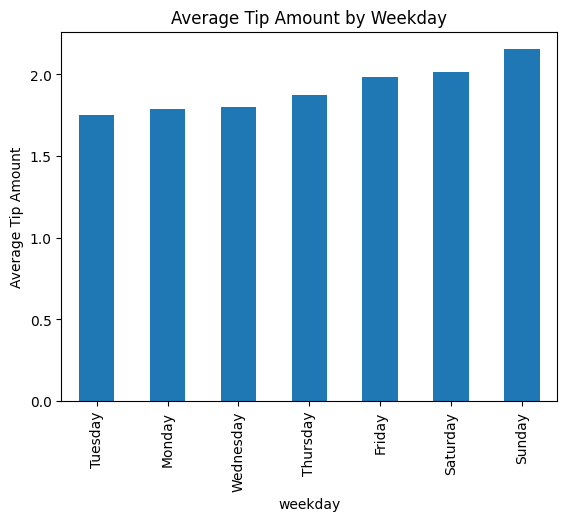

In [266]:
# j) Groupby average tip_amount by weekday
weekday_tip = nycgreentaxi.groupby('weekday')['tip_amount'].mean().sort_values()
print(weekday_tip)
weekday_tip.plot(kind='bar')
plt.title('Average Tip Amount by Weekday')
plt.ylabel('Average Tip Amount')
plt.show()

payment_type
3.0   -0.057173
2.0    0.000000
4.0    0.000000
5.0    0.000000
1.0    2.867553
Name: tip_amount, dtype: float64


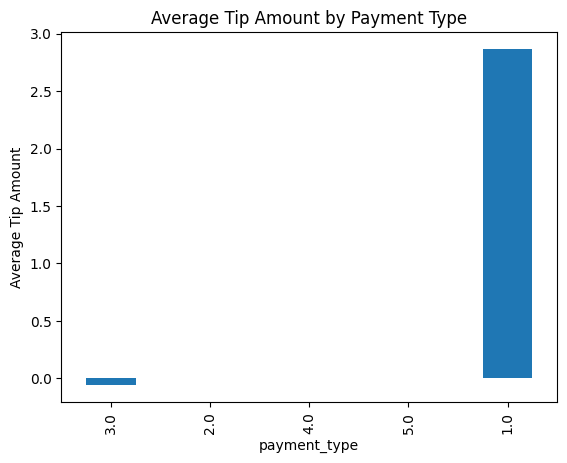

In [267]:
# k) Groupby average tip_amount by payment_type
payment_tip = nycgreentaxi.groupby('payment_type')['tip_amount'].mean().sort_values()
print(payment_tip)
payment_tip.plot(kind='bar')
plt.title('Average Tip Amount by Payment Type')
plt.ylabel('Average Tip Amount')
plt.show()

In [268]:
# l) Test null hypothesis: average total_amount of different trip_type is identical
trip_type_groups = [nycgreentaxi[nycgreentaxi['trip_type'] == i]['total_amount'] for i in nycgreentaxi['trip_type'].unique()]
f_val, p_val = stats.f_oneway(*trip_type_groups)
print(f"ANOVA test for trip_type: F-value = {f_val}, p-value = {p_val}")

ANOVA test for trip_type: F-value = 1526.263745822114, p-value = 0.0


In [269]:
# m) Test null hypothesis: average total_amount of different weekday is identical
weekday_groups = [nycgreentaxi[nycgreentaxi['weekday'] == day]['total_amount'] for day in nycgreentaxi['weekday'].unique()]
f_val, p_val = stats.f_oneway(*weekday_groups)
print(f"ANOVA test for weekday: F-value = {f_val}, p-value = {p_val}")

ANOVA test for weekday: F-value = 7.280341722016386, p-value = 8.58978673964077e-08


In [270]:
# n) Test null hypothesis: no association between trip_type and payment_type
contingency_table = pd.crosstab(nycgreentaxi['trip_type'], nycgreentaxi['payment_type'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square test: Chi2 = {chi2}, p-value = {p}")

Chi-square test: Chi2 = 41.28834124323719, p-value = 2.3425645368661445e-08


In [271]:
# o) Numeric variables analysis
num_vars = ['trip_distance', 'extra', 'mta_tax', 'tip_amount',
            'tolls_amount', 'improvement_surcharge', 'congestion_surcharge',
            'trip_duration', 'passenger_count', 'total_amount']

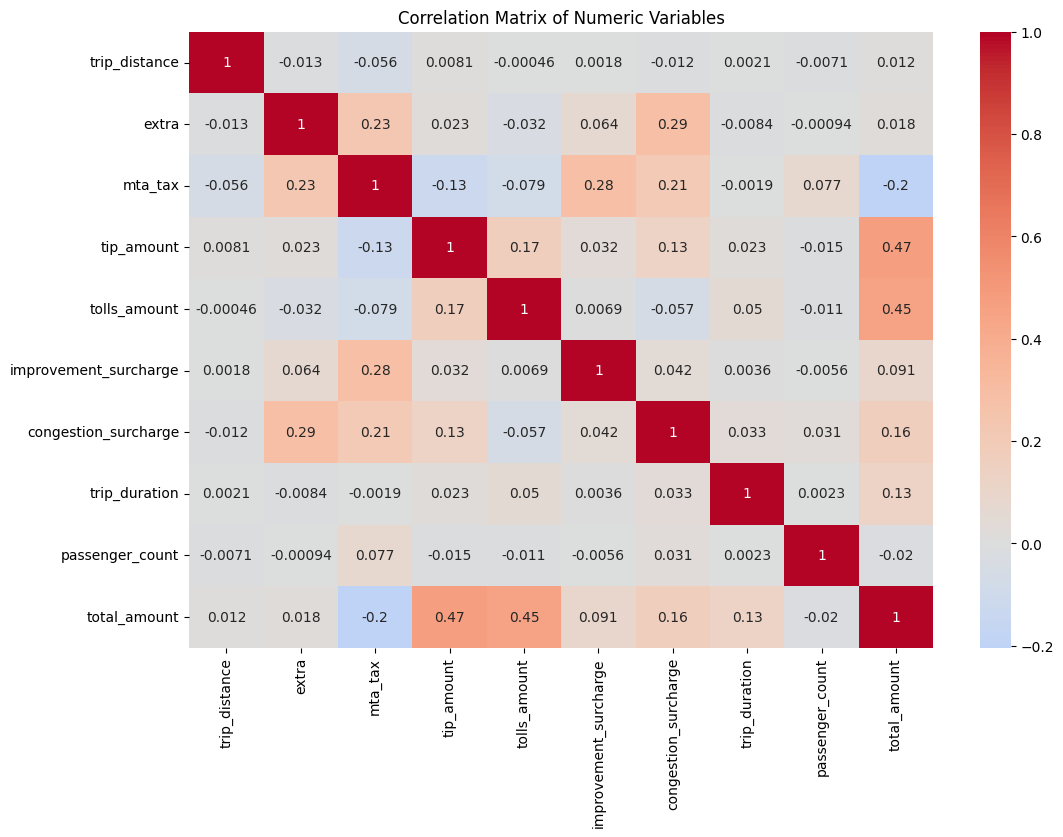

In [272]:
# Correlation matrix
corr_matrix = nycgreentaxi[num_vars].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


In [273]:
# p) Object variables analysis
obj_vars = ['store_and_fwd_flag', 'RatecodeID', 'payment_type', 'trip_type', 'weekday']

In [274]:
# q) Dummy encode object cols
nycgreen_encoded = pd.get_dummies(nycgreentaxi, columns=obj_vars, drop_first=True)

Text(0.5, 1.0, 'Histogram of Total Amount')

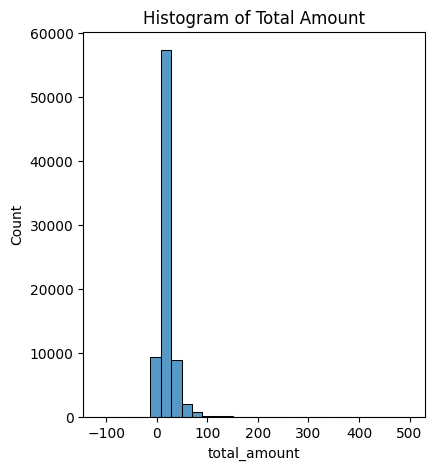

In [275]:
# r) Dependent Variable analysis - total_amount
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(nycgreentaxi['total_amount'], kde=False, bins=30)
plt.title('Histogram of Total Amount')

Text(0.5, 1.0, 'Boxplot of Total Amount')

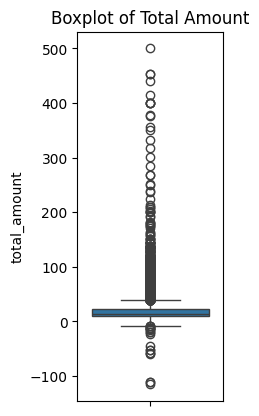

In [276]:
plt.subplot(1, 3, 2)
sns.boxplot(y=nycgreentaxi['total_amount'])
plt.title('Boxplot of Total Amount')

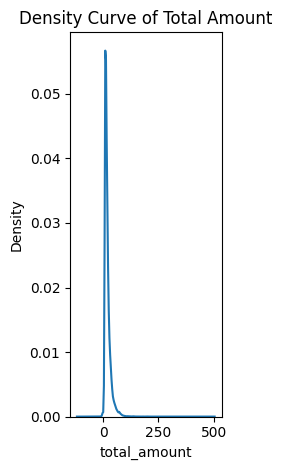

In [277]:
plt.subplot(1, 3, 3)
sns.kdeplot(nycgreentaxi['total_amount'])
plt.title('Density Curve of Total Amount')
plt.tight_layout()
plt.show()

In [278]:
# s) Regression Models
# Prepare data
X = nycgreen_encoded.drop(['total_amount', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'VendorID'], axis=1, errors='ignore')
y = nycgreen_encoded['total_amount']


In [279]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [280]:
# 1. Multiple Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Linear Regression:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

Linear Regression:
RMSE: 12.259989479926077
R2 Score: 0.3990247648825175


In [281]:
# 2. Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("\nDecision Tree:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")


Decision Tree:
RMSE: 8.423215767103443
R2 Score: 0.716317704670735


In [282]:

# 3. Random Forest with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("\nRandom Forest:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")


Random Forest:
RMSE: 6.7364838185496465
R2 Score: 0.8185558699293527


In [283]:
# 4. Gradient Boosting with 100 trees
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print("\nGradient Boosting:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")


Gradient Boosting:
RMSE: 8.345082925585107
R2 Score: 0.721556108815463
